In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sys 

sys.path.append('../../My-Code/')

import timetools as tt
import omdutils as omd
import warnings 

warnings.simplefilter('ignore')

%matplotlib inline

In [103]:
plt.rcParams['figure.figsize'] = [7, 5]

## Dataset 

In [104]:
# data = pd.read_csv('../data/shampoo.csv')
# omd.to_postgres(data, 'shampoo', 'Datasets')

In [105]:
data = omd.from_postgres('select * from shampoo', 'Datasets')

In [106]:
data['Time'] = '200' + data['Month'] + '-01'
data['Time'] = pd.to_datetime(data['Time'])
data.set_index('Time', inplace=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2001-01-01 to 2003-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 864.0+ bytes


,Month,Sales
Time,,
2001-01-01,1-01,266.0
2001-02-01,1-02,145.9
2001-03-01,1-03,183.1
2001-04-01,1-04,119.3
2001-05-01,1-05,180.3


Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Differenced?  d=1

Test Statistic                -7.249074e+00
p-value                        1.799857e-10
#Lags Used                     1.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64

The time series is stationary.
Differenced?  d=1



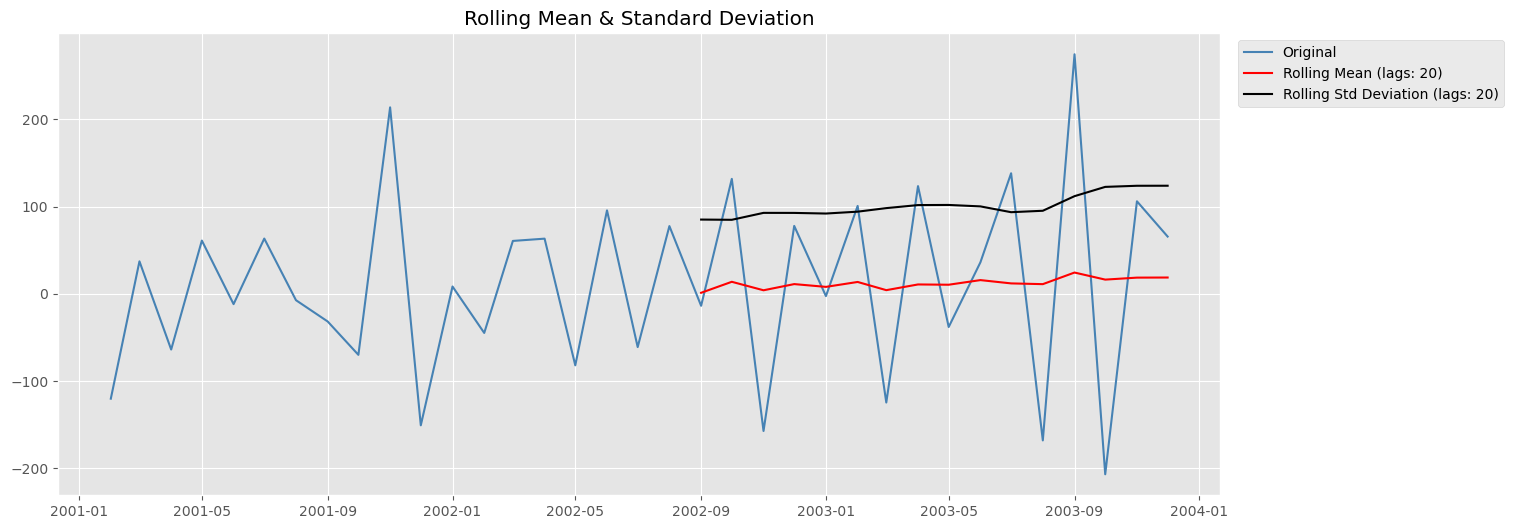

In [107]:
tt.adf_v2(data['Sales'], diff=1)
tt.plot_for_stationary(data['Sales'], diff=1)

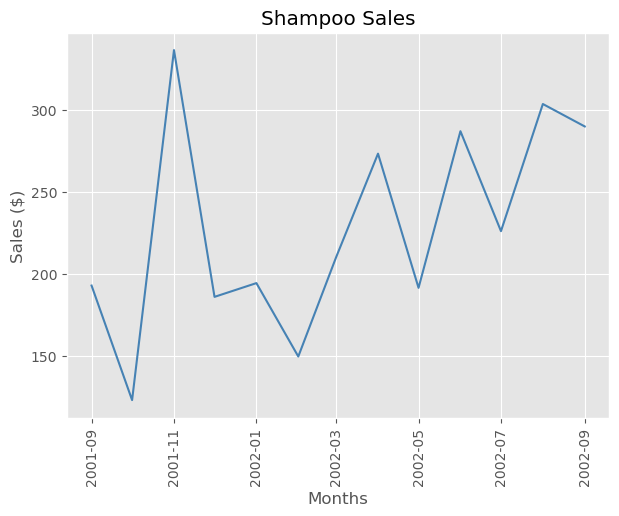

In [108]:
plt.style.use('ggplot')
plt.plot(data.loc['2001-09':'2002-09'].Sales, color='steelblue')
# plt.plot(data['Sales'].diff(1), c='steelblue')
plt.title('Shampoo Sales')
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Sales ($)');

In [109]:
data.head(10)

,Month,Sales
Time,,
2001-01-01,1-01,266.0
2001-02-01,1-02,145.9
2001-03-01,1-03,183.1
2001-04-01,1-04,119.3
2001-05-01,1-05,180.3
2001-06-01,1-06,168.5
2001-07-01,1-07,231.8
2001-08-01,1-08,224.5
2001-09-01,1-09,192.8


### Dataset summary 

In [110]:
data.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [111]:
data.Sales.mean()

312.59999999999997

In [112]:
data.Sales.std()

148.93716412347473

## Visualizations 
### Histograms

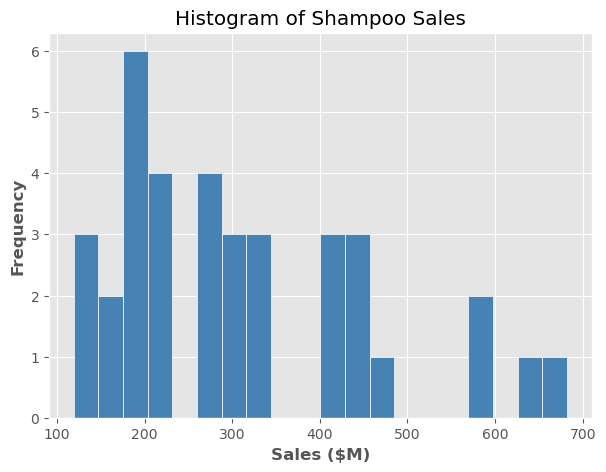

In [113]:
data.Sales.hist(color='steelblue', edgecolor='white', bins=20)
plt.ylabel('Frequency', fontweight='bold')
plt.xlabel('Sales ($M)', fontweight='bold')
plt.title('Histogram of Shampoo Sales');

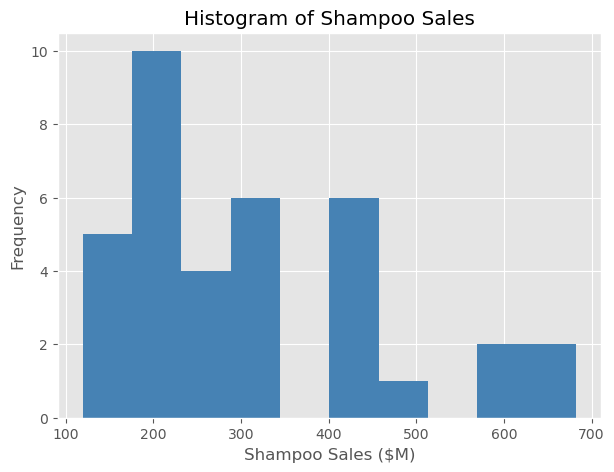

In [114]:
plt.hist(data['Sales'], color='steelblue')
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Frequency');

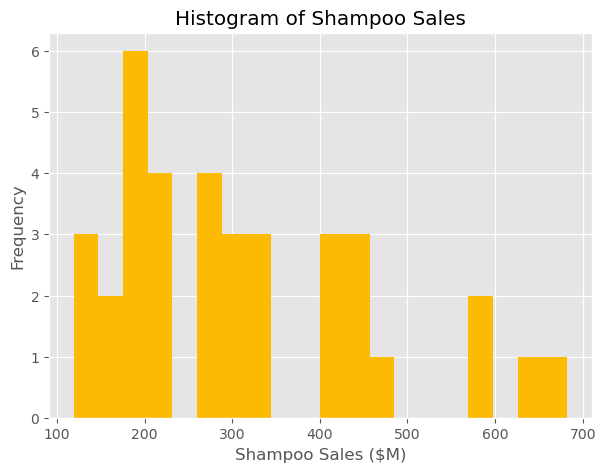

In [115]:
plt.hist(data['Sales'], bins=20, color='#fcba03')
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Frequency');

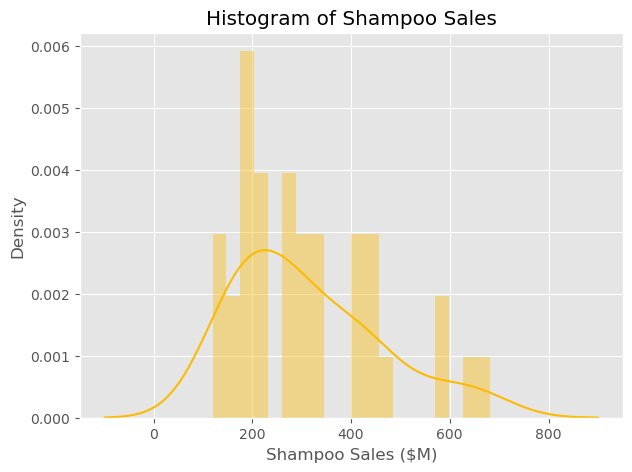

In [116]:
sns.distplot(data['Sales'], bins=20, hist=True, kde=True, color='#fcba03');
plt.title('Histogram of Shampoo Sales');
plt.xlabel('Shampoo Sales ($M)');
plt.ylabel('Density');

### Scatter plots 

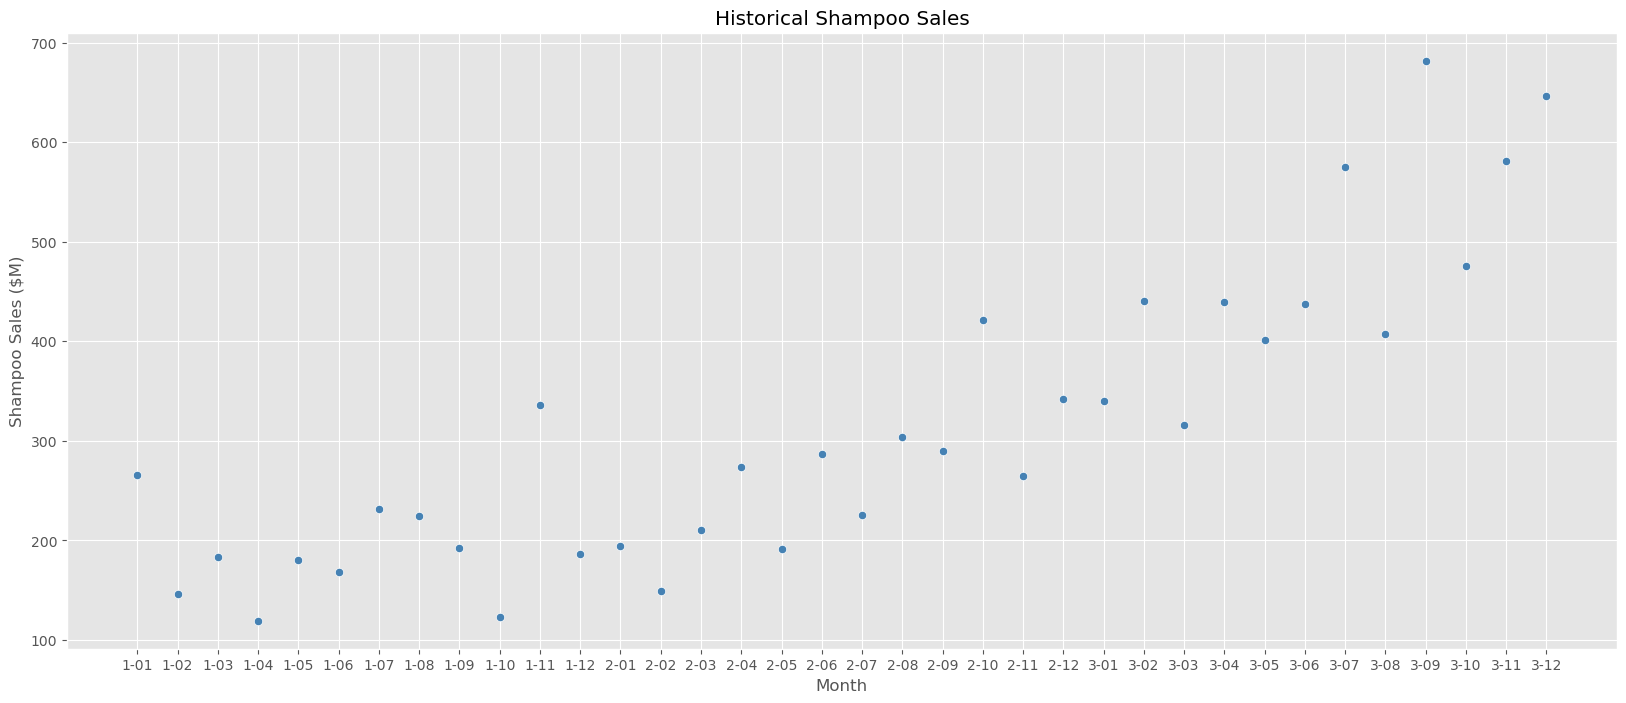

In [117]:
plt.figure(figsize=(20, 8))

sns.scatterplot(x=data['Month'], y=data['Sales'], color='steelblue');
plt.title('Historical Shampoo Sales');
plt.ylabel('Shampoo Sales ($M)');
plt.xlabel('Month');

## Inferential Statistics 

In [118]:
# Dataset from here: https://www.co2.earth/historical-co2-datasets

# co2_data = pd.read_csv('../data/co2_dataset.csv')
# omd.to_postgres(co2_data, 'co2_data', 'Datasets')

In [119]:
co2_data = omd.from_postgres('select * from co2_data', 'Datasets')
co2_data

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454000,277.454000,277.454000
1,1,277.137000,277.137000,277.137000
2,2,277.160000,277.160000,277.160000
3,3,277.158000,277.158000,277.158000
4,4,277.157000,277.157000,277.157000
...,...,...,...,...
2010,2010,388.717029,390.784658,386.649401
2011,2011,390.944015,393.041154,388.846876
2012,2012,393.015993,395.036206,390.995779
2013,2013,395.724979,397.714917,393.735042


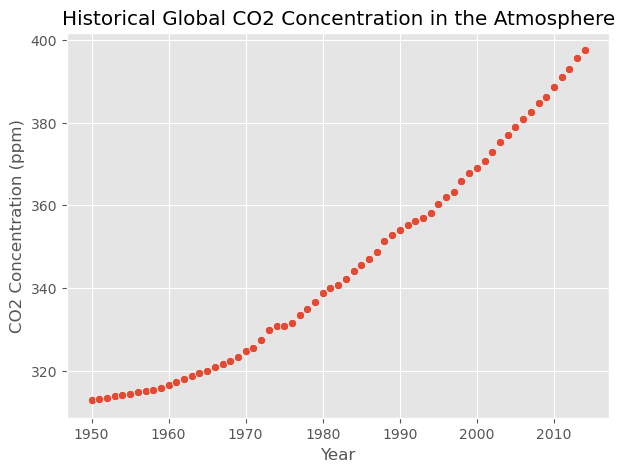

In [120]:
# Let's only consider the data from the year 1950
X = co2_data['year'][1950:] #.values[1950:]
y = co2_data['data_mean_global'][1950:] #.values[1950:]

sns.scatterplot(x=X, y=y);
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');

In [121]:
X = co2_data['year'].values[1950:]
print(X.shape)
X

(65,)


array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [122]:
X = co2_data['year'].values[1950:].reshape(-1, 1)
print(X.shape)
X

(65, 1)


array([[1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [1966],
       [1967],
       [1968],
       [1969],
       [1970],
       [1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]])

In [123]:
X = co2_data['year'].values[1950:].reshape(-1, 1)
y = co2_data['data_mean_global'].values[1950:].reshape(-1, 1)

reg = LinearRegression()

reg.fit(X, y)

print(f"The slope is {reg.coef_[0][0]} and the intercept is {reg.intercept_[0]}")

The slope is 1.3588711929434647 and the intercept is -2348.0338300545372


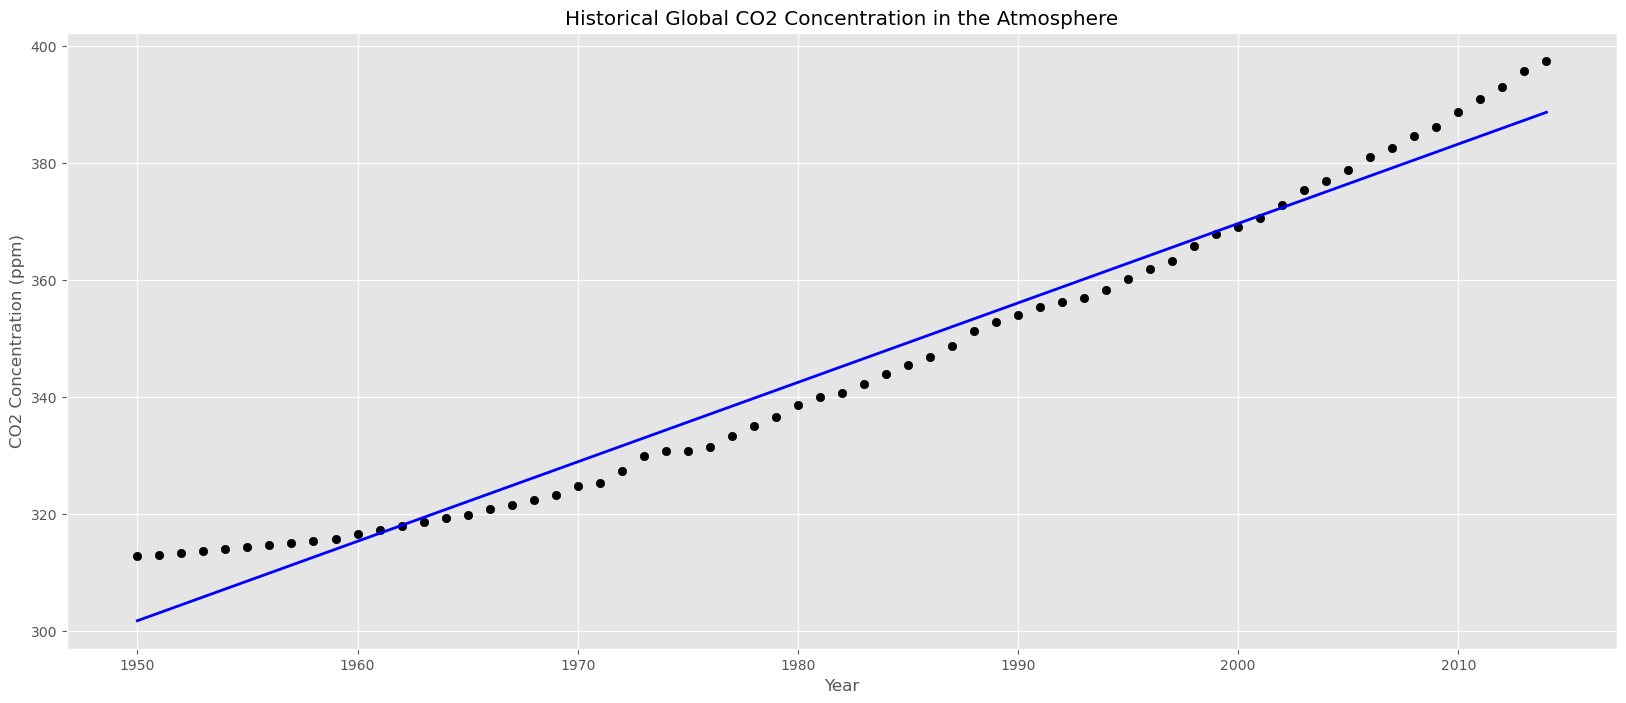

In [124]:
X = co2_data['year'].values[1950:]
y = co2_data['data_mean_global'].values[1950:]

predictions = reg.predict(X.reshape(-1, 1))

plt.figure(figsize=(20, 8))
plt.scatter(X, y,c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.title('Historical Global CO2 Concentration in the Atmosphere');
plt.ylabel('CO2 Concentration (ppm)');
plt.xlabel('Year');
plt.show()

In [125]:
X = sm.add_constant(co2_data['year'].values[1950:])
model = sm.OLS(co2_data['data_mean_global'].values[1950:], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     2073.
Date:                Thu, 05 Jan 2023   Prob (F-statistic):           6.40e-50
Time:                        21:42:56   Log-Likelihood:                -189.19
No. Observations:                  65   AIC:                             382.4
Df Residuals:                      63   BIC:                             386.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2348.0338     59.161    -39.689      0.0

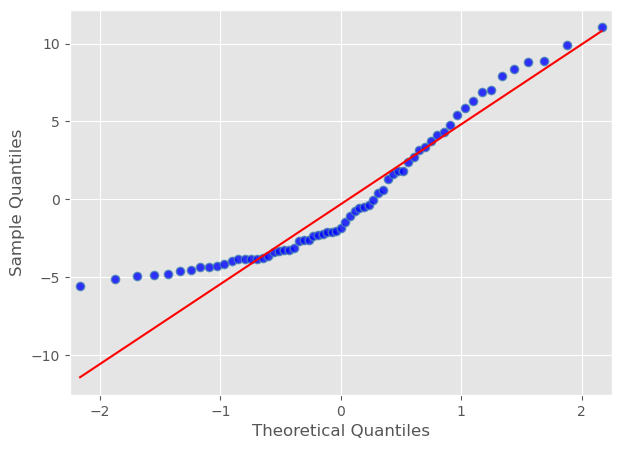

In [126]:
residuals = model.resid
qq_plot = sm.qqplot(residuals, line='q', markerfacecolor='blue', 
    markeredgecolor='steelblue', color='black', alpha=0.8)

plt.show();

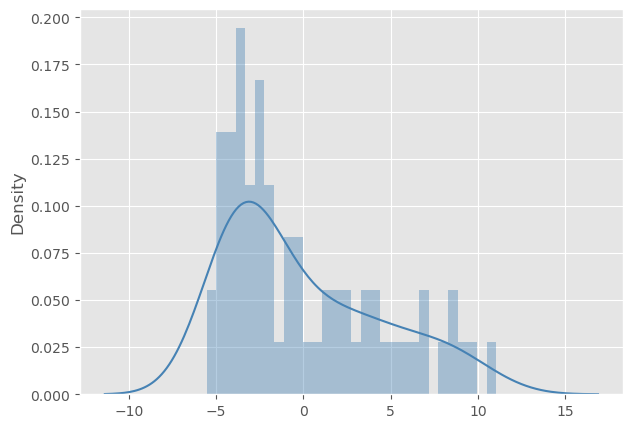

In [127]:
# plt.hist(residuals, ec='white', bins=30, color='steelblue');
sns.distplot(residuals, bins=30, hist=True, kde=True, color='steelblue', );

## Shapiro-Wilk Test in Python (Normality Test)
[www.geeksforgeeks.org](https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/)  

Ho(Accepted): Sample is from the normal distributions.**(Po>0.05)**  
Ha(Rejected): Sample is not from the normal distributions.

In [128]:
from scipy import stats

shapiro_test = stats.shapiro(residuals)

if shapiro_test.pvalue <= 0.05:
    print('p-value = {0:0.6f}\nThe distribution of the residuals is not normal.'.format(shapiro_test.pvalue))
else:
    print('p-value = {0:0.6f}\nThe distribution of the residuals is normal.'.format(shapiro_test.pvalue))

p-value = 0.000041
The distribution of the residuals is not normal.
